<a href="https://colab.research.google.com/github/joaopauloev/Topicos-Contemporaneos/blob/main/Projeto_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alunos:

- Vandelson Elias - vemf@cesar.school
- João Paulo Galindo Epifani Veloso - jpgev@cesar.school


1. Fine-Tuning de uma CNN para Classificação

  Um dataset de sua escolha deverá ser coletado e preparado para realizar o fine-tuning de uma CNN. O projeto será avaliado nos seguintes aspectos:

* Construção do Dataset
* Data Augmentation
* Uso de Modelos Pré-Treinados
* Construção do Modelo Classificador
* Congelamento de Camadas

# Fine-Tuning de uma CNN para Classificação

### * Construção do Dataset:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

100%|██████████| 68.8M/68.8M [00:00<00:00, 167MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [17]:
import os

# Diretório base onde o dataset foi extraído
data_dir = '/content/fashion-mnist'  # Substitua pelo caminho real no seu sistema

# Caminhos para as pastas de treino e teste
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

In [12]:
!pip install torch torchvision

### - Carregar o dataset usando ImageFolder

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# Filter out the specific warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*cuDNN.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*cuFFT.*")
warnings.filterwarnings("ignore", category=UserWarning, message=".*cuBLAS.*")

In [21]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels)=fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### - Exibir algumas imagens de exemplo

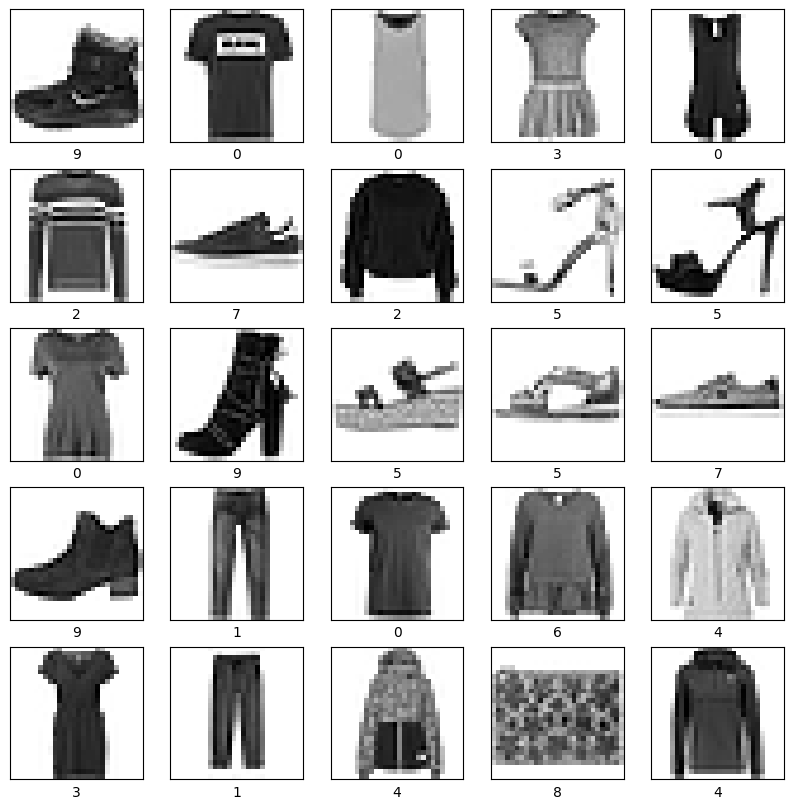

In [22]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

### - Vamos verificar a forma

In [23]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


### - Exibindo a primeira imagem em train_images

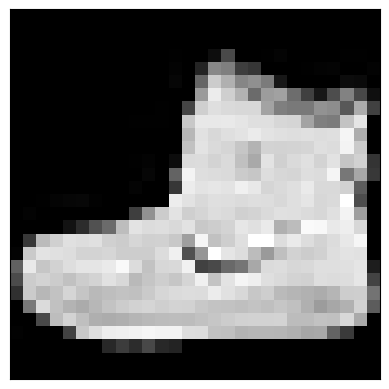

In [25]:
plt.imshow(train_images[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

### * Data Augmentation

In [26]:
from torchvision import transforms

# Defina as transformações para o dataset com Data Augmentation
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Adiciona flip horizontal aleatório
    transforms.RandomRotation(15),  # Adiciona rotação aleatória
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

### * Uso de Modelos Pré-Treinados

In [27]:

import torchvision.models as models

# Carregar o modelo pré-treinado ResNet18
model = models.resnet18(pretrained=True)

# Substituir a última camada para se ajustar ao número de classes no dataset
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 2)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


### * Construção do Modelo Classificador

In [28]:
import torch.optim as optim

# Definir a função de perda e o otimizador
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [34]:
input_layer=tf.keras.layers.Input(shape=(28, 28, 1))
model=tf.keras.models.Sequential([
    input_layer,
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='sigmoid')

])

### * Congelamento de Camadas

In [29]:
for param in model.parameters():
    param.requires_grad = False

# Descongelar a última camada
for param in model.fc.parameters():
    param.requires_grad = True

### * Treinamento e Curvas de Desempenho

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [40]:
import torch
import torchvision.models as models

model = models.resnet18(pretrained=True)

# Substituir a última camada para se ajustar ao número de classes no dataset
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 10)

train_images = torch.tensor(train_images, dtype=torch.float32).reshape(-1, 1, 28, 28)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_images = torch.tensor(test_images, dtype=torch.float32).reshape(-1, 1, 28, 28)
test_labels = torch.tensor(test_labels, dtype=torch.long)

Epoch [1/10] Train Loss: 0.5037 Train Acc: 82.14% Val Loss: 0.3729 Val Acc: 86.12%
Epoch [2/10] Train Loss: 0.3420 Train Acc: 87.57% Val Loss: 0.3302 Val Acc: 87.88%
Epoch [3/10] Train Loss: 0.2974 Train Acc: 89.25% Val Loss: 0.3076 Val Acc: 89.36%
Epoch [4/10] Train Loss: 0.2636 Train Acc: 90.42% Val Loss: 0.2873 Val Acc: 89.55%
Epoch [5/10] Train Loss: 0.2379 Train Acc: 91.28% Val Loss: 0.2793 Val Acc: 89.70%
Epoch [6/10] Train Loss: 0.2147 Train Acc: 92.15% Val Loss: 0.2777 Val Acc: 89.93%
Epoch [7/10] Train Loss: 0.1954 Train Acc: 92.83% Val Loss: 0.2757 Val Acc: 90.02%
Epoch [8/10] Train Loss: 0.1765 Train Acc: 93.44% Val Loss: 0.2670 Val Acc: 90.66%
Epoch [9/10] Train Loss: 0.1620 Train Acc: 93.95% Val Loss: 0.2672 Val Acc: 90.89%
Epoch [10/10] Train Loss: 0.1567 Train Acc: 94.19% Val Loss: 0.2810 Val Acc: 90.48%


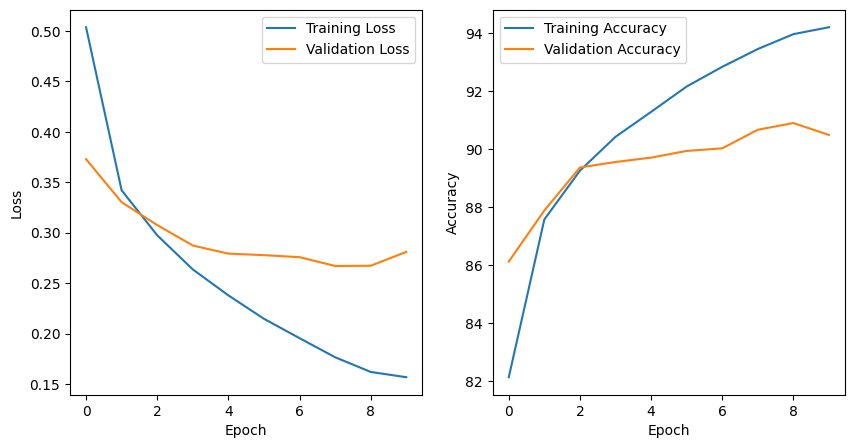

In [46]:
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Load pre-trained ResNet18
model = models.resnet18(pretrained=True)

# Modify the first convolutional layer to accept 1 input channel
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) # Change in_channels to 1

# Modify the final layer to match the number of classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

# Assuming train_images, train_labels, test_images, test_labels are already loaded
# Convert data to PyTorch tensors and create datasets
train_images = torch.tensor(train_images, dtype=torch.float32).reshape(-1, 1, 28, 28)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_images = torch.tensor(test_images, dtype=torch.float32).reshape(-1, 1, 28, 28)
test_labels = torch.tensor(test_labels, dtype=torch.long)

train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    # Train the model
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluate the model
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(test_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}] Train Loss: {train_loss:.4f} Train Acc: {train_accuracy:.2f}%"
          f" Val Loss: {val_loss:.4f} Val Acc: {val_accuracy:.2f}%")

# Plot the learning curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()